<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/jura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tpot

import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=d92cacdce3ffcbb7c26ddbe24415ca4701c265bea3d272fde1b3e121b6a821a0
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTRegressor

In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving csv_result-jura.csv to csv_result-jura.csv


In [ ]:
import pandas as pd
df = pd.read_csv("csv_result-jura.csv")
df.head()
y_col = [
'Cd',
'Cu',
'Pb',
# 'Y4',
# 'Y5',
# 'Y6'
]
y = df[y_col]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
X = df[df.columns.drop(y)]
#X=df.drop(columns=['Cd','Cu','Pb'])
y.head()


,Cd,Cu,Pb
0,1.740,25.72,77.36
1,1.335,24.76,77.88
2,1.610,8.88,30.80
3,2.150,22.70,56.40
4,1.565,34.32,66.40


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))

# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler


In [ ]:
X_train

,Xloc,Yloc,Landuse=1,Landuse=2,Landuse=3,Landuse=4,Rock=1,Rock=2,Rock=3,Rock=4,Rock=5,Cr,Ni,Zn,Co
211,2.220,2.732,0,1,0,0,0,1,0,0,0,43.48,23.88,62.28,12.280
328,2.251,3.288,0,0,1,0,0,0,0,0,1,14.92,4.68,26.80,1.920
102,3.590,4.033,0,1,0,0,0,0,1,0,0,56.40,24.84,79.60,7.920
332,2.218,1.485,0,1,0,0,1,0,0,0,0,34.08,16.36,70.00,12.040
228,3.308,2.963,0,0,1,0,0,0,0,0,1,36.00,23.92,78.40,17.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,4.113,2.700,1,0,0,0,0,1,0,0,0,8.72,7.16,65.20,1.552
17,3.043,4.692,0,0,1,0,1,0,0,0,0,25.20,11.32,31.32,3.536
230,3.692,2.430,1,0,0,0,0,1,0,0,0,19.40,8.76,31.16,5.000
98,3.085,1.677,0,0,1,0,0,1,0,0,0,40.40,29.80,107.20,11.800


In [ ]:
y_train

,Cd,Cu,Pb
211,0.770,16.00,44.40
328,0.330,5.72,18.68
102,2.080,11.52,37.56
332,0.375,19.36,45.20
228,1.060,28.00,50.00
...,...,...,...
83,1.285,13.64,84.40
17,0.625,8.24,29.92
230,1.610,9.44,42.80
98,2.040,26.20,63.92


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10, scoring='neg_mean_squared_error'))
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=rfg, transformer=target_transformer)
model = rfg.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)




Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3527173659490148

Generation 2 - Current best internal CV score: -0.3527173659490148

Generation 3 - Current best internal CV score: -0.3527173659490148

Generation 4 - Current best internal CV score: -0.3527173659490148

Generation 5 - Current best internal CV score: -0.3527173659490148

Best pipeline: LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=False)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -273.9278079710319

Generation 2 - Current best internal CV score: -273.9278079710319

Generation 3 - Current best internal CV score: -270.4372717069029

Generation 4 - Current best internal CV score: -270.4372717069029

Generation 5 - Current best internal CV score: -270.4372717069029

Best pipeline: LassoLarsCV(PolynomialFeatures(StandardScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), normalize=False)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -515.6820942287112

Generation 2 - Current best internal CV score: -504.2465488649289

Generation 3 - Current best internal CV score: -485.6472028115565

Generation 4 - Current best internal CV score: -445.530336936788

Generation 5 - Current best internal CV score: -444.5473157879618

Best pipeline: ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=7, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


0.5217034611357763

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE  is',rmse1)
mae1=mean_absolute_error(y_test, y_pred)
print('MAE is',mae1)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 14.930190241170694
MAE is 7.922216016319439
rmse_per_output: [ 0.49422984 11.7131741  23.04970783]
arrmse = 0.020439860937975198
Percentage arrmse = 2.04%


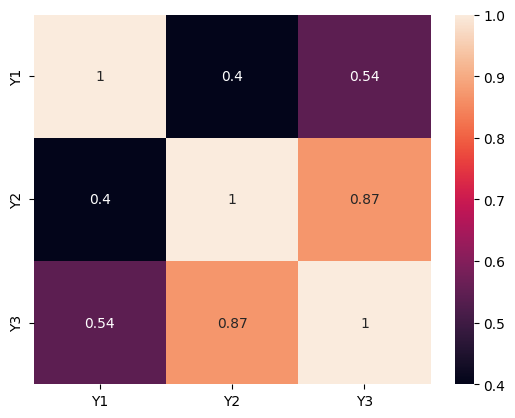

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg2 = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=100000000)
chain = RegressorChain(base_estimator=reg2, order=[0,1,2]).fit(X_train, y_train)
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=chain, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
model.score(X_test, y_test)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

0.4608732101620505

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse2=math.sqrt(mean_squared_error(y_test, y_pred2))
print('RMSE  is',rmse2)
mae2=mean_absolute_error(y_test, y_pred2)
print('MAE is',mae2)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred2)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 15.718309379875064
MAE is 8.461163261044135
rmse_per_output: [ 0.56070756 11.81642712 24.52046913]
arrmse = 0.022931024959061724
Percentage arrmse = 2.29%


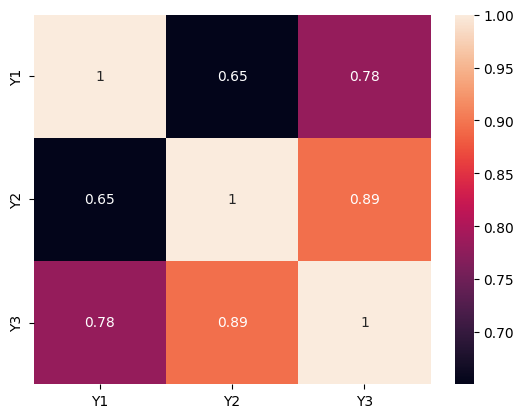

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    i = 0
    for i in range(yy):

      reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')

      Xi = np.column_stack([X, y[:, :i]])
      yi = y[:, i]


      self.regs.append(reg.fit(Xi, yi))
    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.column_stack([X, y[:, :i]]))
    return y


In [ ]:
import numpy as np
from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3684411342175417

Generation 2 - Current best internal CV score: -0.36752840762337513

Generation 3 - Current best internal CV score: -0.35796770875898404

Generation 4 - Current best internal CV score: -0.35796770875898404

Generation 5 - Current best internal CV score: -0.35796770875898404

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=7, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -240.314686776639

Generation 2 - Current best internal CV score: -240.314686776639

Generation 3 - Current best internal CV score: -240.29830180057343

Generation 4 - Current best internal CV score: -240.29830180057343

Generation 5 - Current best internal CV score: -240.22132974472044

Best pipeline: ElasticNetCV(LassoLarsCV(input_matrix, normalize=False), l1_ratio=0.5, tol=0.1)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -299.93033547753544

Generation 2 - Current best internal CV score: -292.91841530115744

Generation 3 - Current best internal CV score: -292.91841530115744

Generation 4 - Current best internal CV score: -292.91841530115744

Generation 5 - Current best internal CV score: -275.1674803110136

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=2, n_estimators=100)


In [ ]:
Ypred2 = reg2.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is -1.7391947439351416


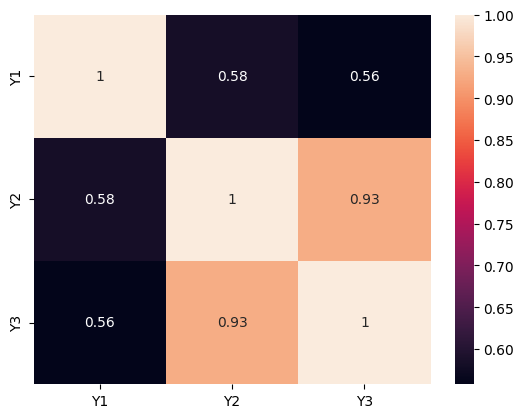

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 39.17592428309301
MAE  is 21.50250548144872
rmse_per_output: [ 0.62495285 31.42707978 60.1349085 ]
relative_root_mean_squared_error = Cd    0.000607
Cu    0.030545
Pb    0.058446
dtype: float64
arrmse = 0.029866137475881443
Percentage arrmse = 2.99%
